# Project 3 - Frequency analysis on floating wind turbine



**Project deadline:** This project is due for submission on Wednesday, 16.06.2022, 23:55. Please check carefully the *About the Projects* section below for further details.
Because of the holidays from 07.06.-10.06., you have three weeks to work on this project. 

**Important:** You have the choice between two projects. This project is a follow up on the lecture on Fourier transforms and how we can use this technique to analyze physical objects and solve such problems. The other project brings the word-game from project2 to a new level. We strongly advise you to read through both project notebooks completely before you take a decision.

**Remark:** This project is stand-alone and you also can work on it if you *did not* work on the Wind turbine in project1. 

**Hand in:** Please continue this notebook and hand this in as .ipynb file at [Projects/Project 3](https://ecampus.uni-bonn.de/goto_ecampus_exc_2645968.html).

## Your name here: Paarth Thakkar

# Floating wind turbines
Currently, the demand for renewable energy is very high. Wind turbines are very successful sources of renewable energy, and many states are planning new wind farms to increase the fraction of green energy in the overall consumption. Despite the high demand, it is difficult to establish large new onshore (land-based) wind farms due to space limitations: Attention has to be paid to landscape and neighbors.

The same constraints do not limit offshore wind farms. However, a conventional offshore wind turbine has a foundation which stands on the seafloor. The foundations are limited to a certain water depth, since the price and complexity of the foundation scales unfavorably with depth. According to Wikipedia, fixed foundations can be installed at water depth up to around 50 m.

This depth constraint limits the possible wind farm locations to a moderate number of areas in the world where the ocean floor falls off relatively flatly away from the shore. 

Therefore, floating foundations are now being developed by many companies.

While floating wind turbine foundations may solve many problems related to installation of offshore wind, the technologies are still being tested. 

In this project you will work with simulated operational data for a floating foundation fitted with a 15 MW wind turbine. At the present time the average size of offshore wind turbines is on the order of 8 MW, but wind turbines in producing in the range of 15-20 MW are being pursued by many of the manufacturing companies. 


### This project
In this project, we will again consider the dataset we used in the last project. 
The data are simulations of a floating 15 MW offshore turbine. The dataset we used in the previous project is for the 50-year event, an extreme storm which occurs very rarely, on time-scales of 50 years. Under such conditions, the rotor blades are turned such that act as aerodynamic they brakes, and the rotor is only turning at a very slow speed.

In the previous project, we studied the time-domain of this dataset,  i.e. the data presented as values as a function of time. We will now study the data in the frequency domain, i.e. the frequency components of this dataset.



The data contains the values shown in this figure as a function of time. 

<img src="figs/windTurbinePicture1.png" width="600" />






## Necessary Python packages

In [1]:
# Here we import the same modules as in the last version of this project.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import pandas as pd
import numpy as np


filename = "data/Orcaflex Simulation, 15 MW wind turbine.csv"

# This one is new, consider what it does. 
units = [pd.read_csv(filename, delimiter = ';', header=2)[key][0] for key in pd.read_csv(filename, delimiter = ';', header=2).keys()]

# We load and save the data.
data = pd.read_csv(filename, delimiter = ';', header=2, skiprows=[3])

data

,Time,Wind speed,Sea surface,Mooring force,Tilt,Nac. acc.,Tower mom.
0,0.0,32.98,0.47,7436.27,-5.56,-1.25,-806154.06
1,0.1,33.24,0.29,7457.32,-5.55,-1.25,-806570.10
2,0.2,33.66,0.11,7475.07,-5.53,-1.24,-806385.89
3,0.3,34.23,-0.06,7489.50,-5.51,-1.23,-805549.79
4,0.4,34.95,-0.22,7500.62,-5.49,-1.21,-804060.69
...,...,...,...,...,...,...,...
35996,3599.6,52.96,0.39,5494.01,-4.00,-0.23,-518214.75
35997,3599.7,53.64,0.30,5510.76,-4.00,-0.21,-516202.25
35998,3599.8,54.17,0.21,5525.76,-4.00,-0.19,-514701.78
35999,3599.9,54.54,0.11,5539.14,-3.99,-0.18,-513763.14


From last time we already The data set contains
* Time in s
* Wind speed in m/s
* Sea surface offset from 'flat water' conditions in m. This is the wave height
* Mooring force in kN. This is the force on the anchor lines  
* Tilt in degrees
* Nacelle acceleration in m/s$^2$. The nacelle is the 'house' on top of the turbine where the rotor is attached
* Tower moment in kN m. This is the torque on from the tower moving with respect to the foundation.  

We make arrays out of the different columns. 

In [2]:
t = np.array(data['Time']) 
seaSurface = np.array(data['Sea surface'])
tilt = np.array(data['Tilt'])
mooring = np.array(data['Mooring force'])
nacAcc = np.array(data['Nac. acc.'])
towerMom = np.array(data['Tower mom.'])
windSpeed = np.array(data['Wind speed'])


In the previous project we considered the behavior of the wind turbine in time-domain. Now we will consider it in frequency domain.

# Your tasks

To solve this project, you should answer the following questions below. 

Remember to choose meaningful x-axes for your plot, as you will that most information is contained at low frequencies. Please also consider when it makes sense to do logarithmic plots.
   
### 1) Fourier transform your variables
Use the numpy real fast fourier transform, np.fft.rfft, on the data, and plot the frequency magnitudes for the different datasets. 

What frequency in the sea surface spectrum has the highest amplitude? What period does this correspond to?

In the previous project we found a strong correlation between the acceleration of the nacelle and the tower moment, following from Newton's 2nd law describing how rotational acceleration translate into a force. Do you also see this in the frequencies?


### 2) Average the Fourier transform
The spectra you plotted in the previous exercise are very noisy.

Write a function which can do an averaged Fourier transform: 
* Snip your time-series into $n$ bits
* Make a Fourier transform of each of the bits
* Mean over the resulting Fourier transforms.

By taking a long time-series, you can get a high frequency resolution. However, the noise level does not change as you measure longer. 
Therefore, by cutting the time series in smaller bits and averaging over the Fourier Transformed signals, we lose frequency resolution, but suppress noise. 

Your function should return the frequencies and the Fourier transform values. 


What happens to the maximal frequency we can measure when we slice the time series into bits?

Test your new function on a 8192-point long signal 
\begin{align}
s(x) = \sum_{f_i} \cos(2\pi f_i x )+\epsilon
\end{align}
for some $x$ with a few frequencies $f_i$ or your choice (start with one frequency component and test it with up to 10 different $f_i$s) and with additional noise $\epsilon$ drawn from a Gaussian distribution around zero. Take a look at the [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)-module to learn how to add Gaussian noise. Observe that you limit noise by averaging.


Does the frequency in the sea surface spectrum with the highest amplitude change much when $n=2,4,8,...$?


We observe two frequency components in the tower moment. One of the frequency components are caused by the turbine eigenfrequency. Which one, and what causes the other one? Compare to the frequency spectra of the other parameters. 

What period does this frequency correspond to?



### 3) Where is the energy?
We have observed that many of the turbine-components oscillate with two frequencies. The energy of a frequency component scales as the square of the frequency amplitude. 

Make a plot which shows the normalized cumulative energy of the mooring - you can use np.cumsum to calculate the cumulative sum. 
Remember to omit the 0th point of the amplitudes. 

What frequency component carries most energy? 


### 4) Creating waves
So far we studied the frequency spectrum of a simulation of a wind turbine subject to a 50-year storm. For such a simulation, the time series for the waves are calculated by taking a known frequency spectrum of waves and transforming these frequencies into sinusoidals which are added together. 

This spectrum is usually drawn from what is called a [JONSWAP-spectrum](https://wikiwaves.org/Ocean-Wave_Spectra). 

In this case, we model the wave-spectrum with a JONSWAP-like spectrum, resulting in a Fourier transform magnitude
\begin{align}
    M(f) = \frac{10^{-7} \,\mbox{Hz}^4 }{f^5}\exp\left(-\frac{3}{4}\left(\frac{f_0}{f}\right)^4\right)\cdot (N+1)/2
\end{align}
where $f$ is the frequency, $f_0$ is the peak frequency, and the constants contain the physical parameter: The wind-speed which gave rise to these waves, the gravitational acceleration, and the drag of the wind on the sea surface. We have already normalized the magnitude by the length of the frequency axis, $N$.

Use your averaging function to plot the frequency spectrum of the actual sea surface. Does this have the same feature as the function $M(f)$? 

Use the inverse fast Fourier transform [np.fft.irfft](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft.html) on $M(f)$ to create a time series and plot it. This should not look nice - what is going on?


To get a realistic wave-pattern, we also need a phase-component. Create an array of the same length as $M(f)$ with phases drawn from an uniform distribution. 
You can calculate the real and imaginary amplitudes of the Fourier transform from the magnitude and angle by
\begin{align}
    RE\,X + i \, IM\,X = M(X)e^{i \phi(X)}.
\end{align}
Calculate the inverse Fourier transform of your new Fourier spectrum, and compare the calculated waves with the actual waves we expect. How does the wave heights compare? 



For real simulations, a number of wave-spectra are generated with different random number generator seeds. Then an appropriate wave series is chosen based on the properties such as highest and lowest waves. 
Generate three different random phase arrays. Use these three to calculate three wave time-series. How different are the maximum and minimum value of the waves?



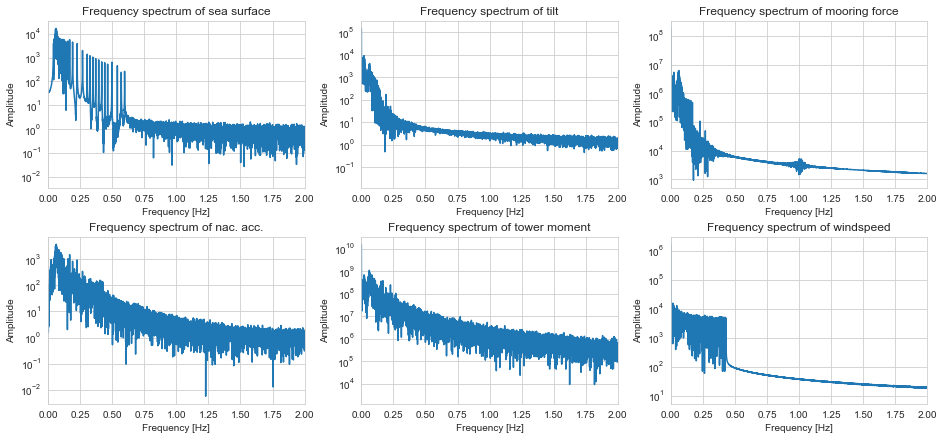

223


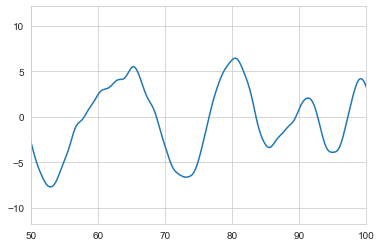

Freq 0.06194444444444445
16.143497757847534
0.3376336440889835


In [22]:
# Your solution begins here

# defining a function that FFT of the input
def fourier(a):
    '''
    takes in an array a as input and 
    returns the real FFT
    '''
    return np.fft.rfft(a)

fft_seaSurface = fourier(seaSurface)
fft_tilt = fourier(tilt)
fft_mooring = fourier(mooring)
fft_nacAcc = fourier(nacAcc)
fft_towerMom = fourier(towerMom)
fft_windSpeed = fourier(windSpeed)

# getting the frequency spectrum
frequency = np.linspace(0,1/(t[1]-t[0])/2,len(t)//2+1)

# plotting
# plt.plot(frequency, np.abs(fft_seaSurface))
# plt.xlabel('Frequency [Hz]');plt.ylabel('Amplitude');plt.title('Freqeuency spectrum of sea surface');plt.xscale('log')
# plt.show()

# plt.plot(frequency, np.abs(fft_tilt))
# plt.xlabel('Frequency [Hz]');plt.ylabel('Amplitude');plt.title('Freqeuency spectrum of tilt');plt.show()

# plt.plot(frequency, np.abs(fft_mooring))
# plt.xlabel('Frequency [Hz]');plt.ylabel('Amplitude');plt.title('Freqeuency spectrum of mooring force');plt.show()

# plt.plot(frequency, np.abs(fft_nacAcc))
# plt.xlabel('Frequency [Hz]');plt.ylabel('Amplitude');plt.title('Freqeuency spectrum of nac. acc.');plt.show()

# plt.plot(frequency, np.abs(towerMom))
# plt.xlabel('Frequency [Hz]');plt.ylabel('Amplitude');plt.title('Freqeuency spectrum of tower momentum');plt.show()

# plt.plot(frequency, np.abs(fft_windSpeed))
# plt.xlabel('Frequency [Hz]');plt.ylabel('Amplitude');plt.title('Freqeuency spectrum of windspeed');plt.show()


# plt.figure()
fig, axs = plt.subplots(2, 3, figsize=(13, 6), constrained_layout=True)
axs[0, 0].plot(frequency, np.abs(fft_seaSurface)); axs[0, 0].set_xlim([0, 2]); axs[0, 0].set_yscale('log')
axs[0, 0].set_title('Frequency spectrum of sea surface')
axs[0, 1].plot(frequency, np.abs(fft_tilt)); axs[0, 1].set_xlim([0, 2]); axs[0, 1].set_yscale('log')
axs[0, 1].set_title('Frequency spectrum of tilt')
axs[0, 2].plot(frequency, np.abs(fft_mooring)); axs[0, 2].set_xlim([0, 2]); axs[0, 2].set_yscale('log')
axs[0, 2].set_title('Frequency spectrum of mooring force')
axs[1, 0].plot(frequency, np.abs(fft_nacAcc)); axs[1, 0].set_xlim([0, 2]); axs[1, 0].set_yscale('log')
axs[1, 0].set_title('Frequency spectrum of nac. acc.')
axs[1, 1].plot(frequency, np.abs(fft_towerMom)); axs[1, 1].set_xlim([0, 2]); axs[1, 1].set_yscale('log')
axs[1, 1].set_title('Frequency spectrum of tower moment')
axs[1, 2].plot(frequency, np.abs(fft_windSpeed)); axs[1, 2].set_xlim([0, 2]); axs[1, 2].set_yscale('log')
axs[1, 2].set_title('Frequency spectrum of windspeed')

# giving labels
for ax in axs.flat:
    ax.set(xlabel='Frequency [Hz]', ylabel='Amplitude')
plt.show()  

def corr (X1, X2) :
## first evaluate the standard deviation of the 2 variables
    stdX1 = np.sqrt(np.mean((X1-np.mean(X1))**2) )
    stdX2 = np.sqrt(np.mean((X2-np.mean(X2))**2) )
    ## returns correlation of 2 variables
    return np.mean((X1-np.mean(X1))*(X2-np.mean (X2)))/(stdX1*stdX2)

print(np.argmax(np.abs(fft_seaSurface)))
plt.plot(t, seaSurface)
plt.xlim(50, 100)
plt.show()
freqq = frequency[np.argmax(np.abs(fft_seaSurface))]
print('Freq', freqq)
print(1/freqq)
print(corr(np.abs(fft_nacAcc), np.abs(fft_towerMom)))


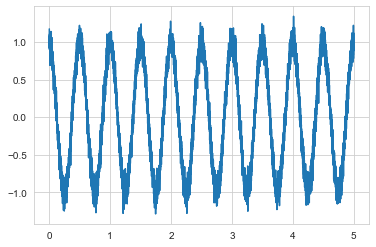

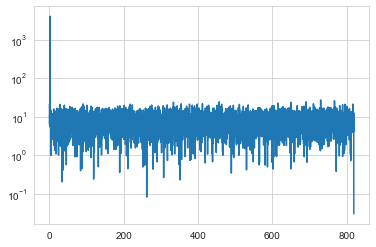

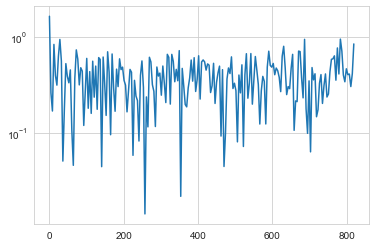

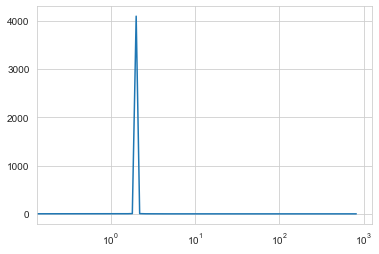

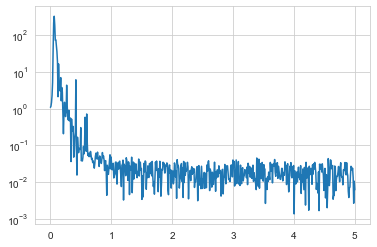

0.062277580071174385


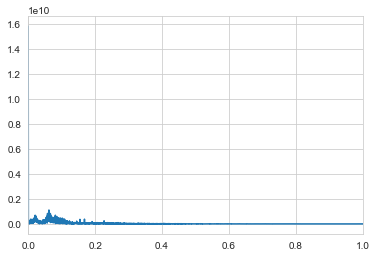

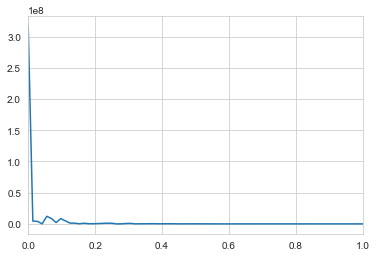

In [110]:
# function that performs average fourier transform

def avg_fourier(time, a, n):
    '''
    takes time, an array a and slice length n as input and
    returns frequency and fourier transform
    '''
#     if n < 2:
#         print('n should be greater than 2')
#         break
    snip = len(time)//n
    temp = 0 
    fft_mean = np.empty(snip)
    for i in range(0, n):
        fft = fourier(a[snip*i:snip*(i+1)])
        temp = temp + fft
    snip_time = time[0:snip]
    fft_mean = temp / n
    freq = np.linspace(0,1/(time[1]-time[0])/2,len(snip_time)//2+1)
    
    return freq, fft_mean


x = np.linspace(0, 5, 8192)
f = 2
f_arr = np.array([1, 2, 4, 6, 10, 15, 30, 35, 40, 50])
freq_space = np.linspace(0, 1 /(x[1] - x[0]) / 2, len(x)//2+1)

s = np.cos(2*np.pi*f*x) + np.random.normal(0, 0.1, 8192)
s_clean = np.cos(2*np.pi*f*x)

plt.plot(x, s)
plt.show()

fft_s = np.fft.rfft(s)

plt.plot(freq_space, np.abs(fft_s))
# plt.xscale('log')
plt.yscale('log')
plt.show()

freq2, mean2 = avg_fourier(x, s, 20)
plt.plot(freq2, np.abs(mean2))
# plt.xscale('log')
plt.yscale('log')
plt.show()

fft_sclean = np.fft.rfft(s_clean)
plt.plot(freq_space, np.abs(fft_sclean))
plt.xscale('log')
plt.show()

freq1, mean = avg_fourier(t, seaSurface, 32)
plt.plot(freq1, np.abs(mean))
plt.yscale('log')
plt.show()
print(freq1[np.argmax(np.abs(mean))])


plt.plot(frequency, np.abs(fft_towerMom))
plt.xlim(0., 1)
# plt.yscale('log')
plt.show()

freq_t, mean_t = avg_fourier(t, towerMom, 50)
plt.plot(freq_t, np.abs(mean_t))
plt.xlim(0., 1)
# plt.yscale('log')
plt.show()

**More considerations**

These questions are 'bonus questions'. You should not feel obliged to do them at all, and you can also obtain bonus points via good discussion of the previous points.

If we plot the frequency components of the storm wind-speed, we observe that above a certain threshold no more frequencies appear. This is an artefact of the simulations - but it is also a physically valid assumption that we can ignore the high frequency components of the wind speed. Why?

In task 2 we asked you to mean over the signal in frequency domain. Would it make sense to mean in time-domain and Fourier transform this mean?

Could we also mean in a different way?